# Deepwalk

This notebook explores the DeepWalk algorithm from 2014 whitepaper. learning, experimenting, and explaining it in my own words. I may refine and share parts of this as a future blog post.

## Why they came up with it
the whitepaper (freely available on arxiv) says (here is some direct paraphrasing) 

"The sparsity of a network representation is both a strength
and a weakness. Sparsity enables the design of eﬃcient dis-
crete algorithms, but can make it harder to generalize in
statistical learning. Machine learning applications in net-
works (such as network classification [15, 37], content rec-
ommendation [11], anomaly detection [5], and missing link
prediction [22]) must be able to deal with this sparsity in
order to survive."

so let's go over their statements. Sparsity is a strength because it enables efficient discrete algorithms. Why? How?

"sparsity of network representation." OK. already stumbling on terminology. I'm going to say this refers to the way that we represent things with graphs and its tendency to be closer to a set of things that aren't connected at all than it is to a set of things that are fully connected.

Cool so they say this enables efficient discrete algorithms. Now I'm wondering why. The intuitive thing to think is that a lot of graph analysis algorithms involve looking at the connections, sometimes one by one, and sometimes in relationship with each other as paths between several nodes. the number of operations it would take to analyze a graph with one of these algorithms likely grows with the number of connections between nodes, either linearly, exponentially or greater. 

Ok, that makes sense. 


then the next statement, "but it can make it harder to generalize in statistical learning". 

Yeah, I guess I can kind of see this. Trying not to poison the well with my knowledge about how statistical learning involves vectors and things need to fit into vectors to be used as inputs to these methods, it seems as though they are getting at a deeper point, like that if graphs tended to be more dense, it would be easier to use them in statistical learning methods. I wonder if that is because these methods typcially rely on tallying up how often something occurs, and so creating an input out of something that is mostly empty will make it hard for the model that is learning from this data to come up with anything becasue so much of what it is looking at is empty. Kind of like scattering pieces of a map in a cave. 

So this gives good motivation for why, to make graphs fit better into traditional statistical modeling and have the statistical learning methods benefit from the rich way that graphs can capture patterns in data, it would be good to have a way to convert a graph into a denser representation. Better still if that representation could take the form of something that the statistical learning algorithm already knows how to work with. 




In [1]:
simple_graph = {
    "A": ["B", "C"],
    "B": ["A", "D", "E"],
    "C": ["A", "F"],
    "D": ["B"],
    "E": ["B", "F"],
    "F": ["C", "E"]
}

def print_graph(graph):
    for node, edges in graph.items():
        print(f"{node}: {', '.join(edges)}")

print_graph(simple_graph)

A: B, C
B: A, D, E
C: A, F
D: B
E: B, F
F: C, E


In [4]:
def visualize_graph(graph):
    import networkx as nx
    import matplotlib.pyplot as plt

    G = nx.Graph()
    
    for node, edges in graph.items():
        for edge in edges:
            G.add_edge(node, edge)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=14, font_color='black', font_weight='bold')
    plt.show()

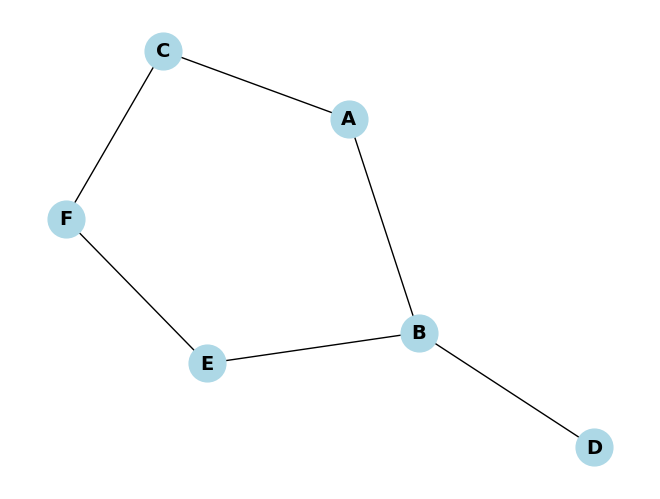

In [5]:
visualize_graph(simple_graph)

 So that is a sparse representation I suppose. but what I don't quite understand is how could you have a less sparse respresentation? I get that a feature vector is more dense I think, but maybe I don't really understand what that means. 

Sparsity is when a graph doesn't have as many connections as its full potential would allow. it is the extent to which it is closer to being a bunch of nodes with no connections as opposed to the opposite extreme where all of the nodes are connected to all of the other nodes. 


"in this paper we introduce _deep learning_ (unsupervised feature learning) techniques, which have proven successful in natural language processing, into network analysis for the first time."

so that is what deepwalk is doing. bridging the gap between deep learning techniques to learn features without labeled examples into the network analysis field. ok, my plain language thing would be now we can use methods that were helpful in other areas to learn about unseen graphs. 

"[DeepWalk] learns _social representations_ of a graph's vertices, by modeling a stream of short random walks. Social representations are latent features of the vertices that capture neighborhood similarity and community membership. these latent representations encode social relations in a continuous vector space with a relatively small number of dimensions. DeepWalk generalized neural language models to process a special language composed of a set of randomly generated walks. Tehse neural language models have been used to capture the semantic and syntactic structure of human language and even logical analogies." 

So this really helps with high level understanding. Now we know that DeepWalk's objective is to teach a neural language model, a neural network that was designed to process and understand language, to instead understand the relationships between different nodes in a given graph. for that graph Deepwalk presents this 'stream of random walks' which would be short segments of connected nodes from the graph, following its existing edges. It feeds that stream into the neural language model and the model uses its existing capability to learn language to learn the 'language' of how the nodes in the graph are connected to each other. the two things it will learn the nodes that are around a given node and also the groups of nodes that tend to be connected together with each other more tightly than they are connected to the rest of the graph. This information is then going to be 'encoded' or rewritten in this 'continuous vector with a relatively small number of dimensions'. two things there. it is continuous because the vector space is a higher dimensional plane that each vector exists in as a series of coordinates, as contrasted to a discrete graph space where a node and an edge are in one place and another node is in another. The lower dimensions, well I am not sure what they mean here. relative to what? probably relative to the higher dimensional sparse representation that you would use to hold information about a graph's nodes and edges in a vector, where a lot of the dimensions are just placeholders for the fact that a denser graph could have a lot more potential connections in it.

They also talk about how the outputs are these "social representations" and those are latent to the graph. that means that a human looking at a graph representation drawn out will not explicitly see these relationships, becuase they are not explicitly represented. there is probably a way to represent the communities that exist in the graph and teh neighborhoods of the graph (note that you are still learning the difference between these), but it isn't something that you get from something like an adjacency matrix. These vectors that our the result of deepwalk have those latent relationships modeled and understandable by the neural language model. 

They are able to demonstrate that their method works by plotting the output of their DeepWalk algorithm on the karate graph in low dimensional 2D space and observing the clusters that are formed and then also doing some color coding based on an analytical method that already exists for doing something similar on the original graph and showing that they align.








Looks like they intent to show the algorithm is practical using mult-label classification problems in large heterogeneous graphs. heterogeneous I think means different kinds of node labels so it isn't all the same type, in knowledge graphs that is a requirement and a lot of useful graphs are knowledge graphs. multilabel network classification I suppose is a way to say what kind of network a graph is with many possible answers more than one of which can be predicted and assigned. 

ok they are going to show me using this multi label network classification problem. and then they refer to a 'relational classification' problem and talk about how the feature vectors in this problem violate a property of assumed independence from one another statistically. i.i.d. independent and identically distributed. 

this is something I didn't pick up from the acronym. the second 'i' and the 'd' are actually one term, identically distributed. 

In any case, this is a property that must hold for the variables in stastics and probability especially wrt machine learning and data science. 

indepdence - ok, so for all the variables, which would be like the things you are looking at, maybe the features in a feature vector or trials, the thing that you are doing a probability distribution over (such as likelihod of heads or likelihood that the picture is a cat and also all of the numbers representing furriness, color, shape, etc. from an image) cannot influence either the likelihood that another variable will happen or the value of that variable. 

so that to me is like the two features in a predictor of whether or not it will rain could be how cold it was yesterday and how many clouds there were, but not two things that influence each other's likelihood like whether I left the house and whether I went to the moon. ?? 

identically distributed means they came from the same larger distribution of data. that means that they have the same statistics but it also means we didn't draw from one pot and then change the pot and draw from it again, it is the same pot. 



they don't talk about how the feature vectors in relational classification don't follow i.i.d. I would assume that it means that if you have a graph and are trying to reason about it, you have a challenge because the nodes in the graph are connected and those connections mean they influence each other's probabilities of occurring. 

approximate inference techniques are used and this sometimes helps use the edges between nodes to improve classification but I don't know how. 

deep walk learns label independent representations of the graph. not sure what they mean here.

ah, here it is "our representation quality is not influenced by the choice of labeled vertices, so they can be shared among tasks." I am not 100% sure what that means. claude to the rescue!

ok so according to the translation I got of this paragraph, what I was missing is that this is again assuming that we are talkinga bout real world networks. they tend to have relationships that exist between their nodes. that means that if you were to just consider features of the nodes independently to classify them, you would instead use some technique that helped you figure out that based on the other nodes you could probably infer something about this node and have it help you classify the node. This means having to do a lot of up front set up to learn the graph and nodes in it and the way their features interact when they are connected and model that explicitly. 

deepwalk doesn't do that. instead of trying to classify or build these models, it is first taking the whole graph and coming up with a representation of it that gets mapped into the vectors. 

## understanding the problem

some formal notation setup. let's classify members of a social network between two categories. 

they define the graph G with vertices V and edges E where an edge is a pair of vertices that has to be somewhere in the cartesian product of the vertices, (V x V). 

there would be some partially labeled network G sub L which is V, E, X, Y  and here I lose it a bit. X is in the subdomain of all real numbers composed of all the vertices in the graph cross with the size of teh feature space and y is part of the subset of all real numbers composed of the absolute value of the vertices as well as the labels. I think it is absolute value at least. I'm not sure exactly what that notation is saying.  

ah got the answer from claude. so that means Matrix dimensions, and the bars ar  to indicate that we want the number of that variable, like nubmer of vertices, which is conditional tot he graph, similarly number of labels with the |Y| term. cool. 





so more or less you ahve a graph that has features about each of the nodes, that is the |V| x X space of features about vertices, and y is the space of labels about those vertices. 

you want to figure out based on X about a given v what its L should be, . 

traditionally you would create a hypothesis function to map some of X to y, so that you could predict y for an unlabeled node in the graph. But what you have with this partially labeled graph is a lot of latent information about how the nodes are connected which can help you predict L

relational classification problem or collective classificatyion problem. 

"inference in an undirected markov network" and then there are classical methods like iterative classification algorithm, gibbs sampling, or label relaxation. They compute the posterior distribution of the labels based on the network structure. Posterior distribution is a probability distribution that has been updated after seeing new data. so it is like these existing methods have some guess about what the labels will be like, and then they make a new guess later after they've seen some of the graph around the points they were focusing on to say "maybe the label is actually this, with some % chance" these methods mix the labels and the graph structure together instead of keeping a purer separation like graph embeddings, because the graph structure is the thing that is immediately used to update the label distribution guess and is reused continuously at every stage to build up the idea of the labels.

capturing the graph structure independently of the label distrubiton. why do we do this? because there are cascading errors that can occur in the other methods. you can also reuse the structure for many classification tasks. 

so the problem here is, in my mind, with the many iterations. you make a wrong observation or a bad guess and it gives you one idea that makes the label representation drift one way, and then subsequent iterations are less likely to correct your mistake and more likely to have you drifting furhter an dfurther from the more accurate representation. 

you are learning this lower dimensional vector space where each of the social concepts is represented by multiple dimensions and each of the dimension represents mulitple concpets.

 the structural learned features can augment the set of existing attributes to help with clasification and you can use thes features generally wioth any classification lgorithm. machine learning algorithms are where they may be best used. 



types of social representations to learn and constraints on learning them

adaptability - if new connections are added to the graph, we don't have to go back and review the existing connections to incorporate what we've now learned

community aware - we are learning these X values, these dimensions where a social concept is spread out among them and they each represent multiple concepts, should be constructed so that if you compare two of these dimensions together and they are similar then it means they share social concepts and are socially similar. "this allows generalization in netowrks with homophily" homophily just means where nodes have similar characteristics. 

low dimensional - if we don't have a lot of data labeled, lower dimensions help models generalize, convergence is better and inference is better.  yeah, but why? 






let me try and remember this without reading the above. the way they classified the problem formally was to define a graph as a set of edges and vertices where the edges were defined as vertex pairs. the goal was established by figuring otu a way to formally define the latent social patterns of the vertices that constituted the structural information stored in the graph. I forget how this was defined. I think it ws somthing like there would be a row of latent info that cpatured some informaiton that went across vertices, and some information. 

ok so they had to define the graph and that is G sub L ( V, E, X, Y). I kind of remember this. the graph has the vertices and the exges and then also these x and y components adn that is how they get the latent patterns, the x and y are things that represeent cross-cutting structural information that is latent in the graph? 

no, X are attriburtes and Y are labels. attributes are properties of nodes, and labels are classifications of nodes. 



this is so they can set up the problem. tradditionally you ahve to map the attributes to labels over the network structure. in the embedding approach instead of the hypothesis beign satisfied by mapping those you change the representation first. this is the relational classification problem or collective classification problem. maybe I should liook this up.

old solution was 'iterative approximate inference'

ok, let's talk about random walks. I think they are "start at one vertice or node, choose a neighbor at random, go there, then choose another neighbor at random, go there. do this up until you get to some number of visited vertices and then that is one walk" 

I think that is pretty much correct after reviewing the formal definition of it. so they mention that random walks are useful to figure out community structure efficiently. 

so they use the stream of short random walks to get info about the network. this is where the walks are the equivalent of sentences for language. There are two other advantages though. first, they can do the walks in parallel to each other on the graph. second, if something in the graph changes, the area can be randomly walked again and the inferences about the graph based on that area updated without global recomputation. 



I need to really understand power law distribution and scale free networks to be able to explain the deep walk paper well.